In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.concat([pd.read_csv('train.csv'), pd.read_csv('test.csv')])
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB
None


In [3]:
print(df.head())

    Age Cabin Embarked     Fare  \
0  22.0   NaN        S   7.2500   
1  38.0   C85        C  71.2833   
2  26.0   NaN        S   7.9250   
3  35.0  C123        S  53.1000   
4  35.0   NaN        S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass     Sex  SibSp  Survived            Ticket  
0       3    male      1       0.0         A/5 21171  
1       1  female      1       1.0          PC 17599  
2       3  female      0       1.0  STON/O2. 3101282  
3       1  female      1       1.0            113803  
4       3    male      0       0.0            373450  


In [4]:
print(df.describe())

               Age         Fare        Parch  PassengerId       Pclass  \
count  1046.000000  1308.000000  1309.000000  1309.000000  1309.000000   
mean     29.881138    33.295479     0.385027   655.000000     2.294882   
std      14.413493    51.758668     0.865560   378.020061     0.837836   
min       0.170000     0.000000     0.000000     1.000000     1.000000   
25%      21.000000     7.895800     0.000000   328.000000     2.000000   
50%      28.000000    14.454200     0.000000   655.000000     3.000000   
75%      39.000000    31.275000     0.000000   982.000000     3.000000   
max      80.000000   512.329200     9.000000  1309.000000     3.000000   

             SibSp    Survived  
count  1309.000000  891.000000  
mean      0.498854    0.383838  
std       1.041658    0.486592  
min       0.000000    0.000000  
25%       0.000000    0.000000  
50%       0.000000    0.000000  
75%       1.000000    1.000000  
max       8.000000    1.000000  


Sex
female    233
male      109
Name: Survived, dtype: int64


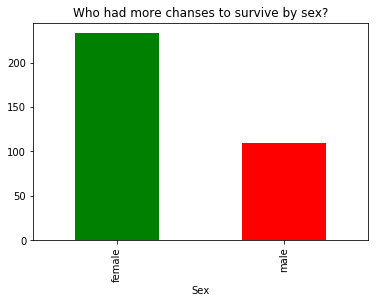

In [5]:
survived_sex = df[df.Survived == 1]
survived_sex = survived_sex.groupby('Sex')['Survived'].count()
survived_sex.plot(kind='bar', 
                  color=['green', 'red'],
                  title='Who had more chanses to survive by sex?')
print(survived_sex)

Pclass
1    136
3    119
2     87
Name: Survived, dtype: int64


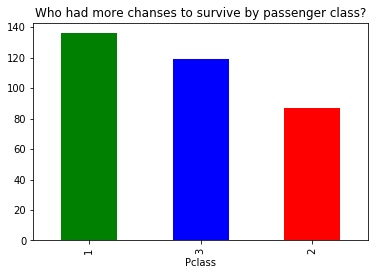

In [6]:
survived_pclass = df[df.Survived == 1]
survived_pclass = survived_pclass.groupby('Pclass')['Survived'].count().sort_values(ascending=False)
survived_pclass.plot(kind='bar', color=['green', 'blue', 'red'],
                     title='Who had more chanses to survive by passenger class?')
print(survived_pclass)

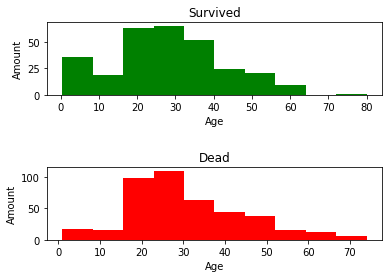

In [7]:
survived = df[df["Survived"] == 1]["Age"].dropna()
perished = df[df["Survived"] == 0]["Age"].dropna()

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
fig.subplots_adjust(hspace=1)
ax1.hist(survived, facecolor='green')
ax1.set_title("Survived")
ax1.set_xlabel("Age")
ax1.set_ylabel("Amount")
ax2.hist(perished, facecolor='red')
ax2.set_title("Dead")
ax2.set_xlabel("Age")
ax2.set_ylabel("Amount")

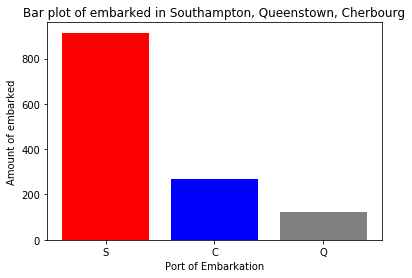

In [8]:
non_empty_embarked = df["Embarked"].dropna()
unique_values, value_counts = non_empty_embarked.unique(), non_empty_embarked.value_counts()
X = range(len(unique_values))
colors = ["red", "blue", "grey"]

plt.bar(left=X,
        height=value_counts,
        color=colors,
        tick_label=unique_values)
plt.xlabel("Port of Embarkation")
plt.ylabel("Amount of embarked")
plt.title("Bar plot of embarked in Southampton, Queenstown, Cherbourg")

In [9]:
print(df.groupby('Age')[['Survived', 'Pclass', 'Fare']].mean())

       Survived    Pclass        Fare
Age                                  
0.17        NaN  3.000000   20.575000
0.33        NaN  3.000000   14.400000
0.42   1.000000  3.000000    8.516700
0.67   1.000000  2.000000   14.500000
0.75   1.000000  3.000000   17.430533
0.83   1.000000  2.333333   19.033333
0.92   1.000000  1.500000   89.650000
1.00   0.714286  2.700000   28.050420
2.00   0.300000  2.583333   34.881250
3.00   0.833333  2.571429   24.066671
4.00   0.700000  2.600000   29.543330
5.00   1.000000  2.800000   24.451660
6.00   0.666667  2.500000   41.261800
7.00   0.333333  2.750000   27.577075
8.00   0.500000  2.333333   28.616667
9.00   0.250000  3.000000   24.192490
10.00  0.000000  3.000000   32.018750
11.00  0.250000  2.500000   54.240625
11.50       NaN  3.000000   14.500000
12.00  1.000000  2.333333   21.997233
13.00  1.000000  2.400000   68.148340
14.00  0.500000  2.500000   41.247400
14.50  0.000000  3.000000   42.002100
15.00  0.800000  2.500000   47.879183
16.00  0.352

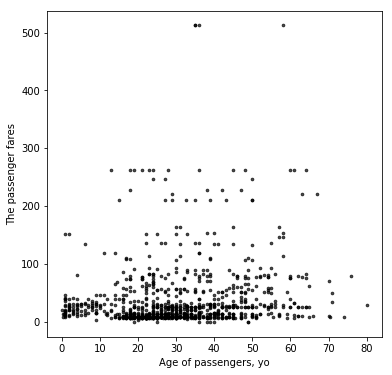

In [10]:
plt.figure(figsize=(6,6))
plt.scatter(df.Age, df.Fare, marker='o', s=7, c='k', alpha=.7)
plt.xlabel('Age of passengers, yo')
plt.ylabel('The passenger fares')
plt.show()

In [11]:
df["Embarked"].fillna("S", inplace=True)
df["Age"].fillna(df["Age"].median(), inplace=True)
df["Fare"].fillna(df["Fare"].median(), inplace=True)

In [12]:
print(df.head())

    Age Cabin Embarked     Fare  \
0  22.0   NaN        S   7.2500   
1  38.0   C85        C  71.2833   
2  26.0   NaN        S   7.9250   
3  35.0  C123        S  53.1000   
4  35.0   NaN        S   8.0500   

                                                Name  Parch  PassengerId  \
0                            Braund, Mr. Owen Harris      0            1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                             Heikkinen, Miss. Laina      0            3   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)      0            4   
4                           Allen, Mr. William Henry      0            5   

   Pclass     Sex  SibSp  Survived            Ticket  
0       3    male      1       0.0         A/5 21171  
1       1  female      1       1.0          PC 17599  
2       3  female      0       1.0  STON/O2. 3101282  
3       1  female      1       1.0            113803  
4       3    male      0       0.0            373450  


In [13]:
def get_dummie_sex(df):
    """Convert to binar number of sex categories"""
    
    df_dummie = pd.get_dummies(df['Sex'][:], prefix="sex")
    df_dummie = pd.concat([df[:],df_dummie[:]], axis=1)
    
    return (df_dummie)

In [14]:
x = df.loc[:,:]
df = get_dummie_sex(x)
df.drop('Sex', axis=1, inplace=True)

In [15]:
def get_dummie_pclass(df):
    """Convert to binar number of Pclass categories"""
    
    df_dummie = pd.get_dummies(df['Pclass'][:], prefix="pclass")
    df_dummie = pd.concat([df[:],df_dummie[:]], axis=1)
    
    return (df_dummie)

In [16]:
x = df.loc[:,:]
df = get_dummie_pclass(x)
df.drop('Pclass', axis=1, inplace=True)

family_size
4     0.724138
3     0.578431
2     0.552795
7     0.333333
1     0.303538
5     0.200000
6     0.136364
11    0.000000
8     0.000000
Name: Survived, dtype: float64


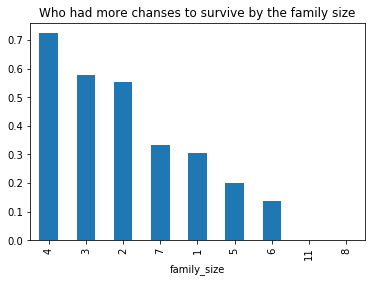

In [17]:
df['family_size'] = df['SibSp'] + df['Parch'] + 1
family_size = df.groupby('family_size')['Survived'].mean().sort_values(ascending=False)
print(family_size)
family_size.plot(kind='bar', title='Who had more chanses to survive by the family size')

In [18]:
df.drop(['SibSp','Parch'], axis=1, inplace=True)

In [19]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
PassengerId    1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
sex_female     1309 non-null uint8
sex_male       1309 non-null uint8
pclass_1       1309 non-null uint8
pclass_2       1309 non-null uint8
pclass_3       1309 non-null uint8
family_size    1309 non-null int64
dtypes: float64(3), int64(2), object(4), uint8(5)
memory usage: 108.7+ KB
None


In [20]:
print(df[['Ticket', 'Survived']].sort_values(by='Ticket'))

                Ticket  Survived
504             110152       1.0
257             110152       1.0
759             110152       1.0
585             110413       1.0
262             110413       0.0
558             110413       1.0
110             110465       0.0
475             110465       0.0
335             110469       NaN
158             110489       NaN
430             110564       1.0
366             110813       1.0
236             110813       NaN
191             111163       NaN
170             111240       0.0
462             111320       0.0
329             111361       1.0
523             111361       1.0
889             111369       1.0
604             111426       1.0
507             111427       1.0
187             111428       1.0
806             112050       0.0
266             112051       NaN
633             112052       0.0
887             112053       1.0
372             112058       NaN
815             112058       0.0
263             112059       0.0
209       

In [21]:
tickets = df['Ticket'].values
print(tickets[:10])

['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736']


In [22]:
df['tickets'] = pd.Series([ticket.split(' ')[-1] for ticket in tickets])
df.tickets = df['tickets'].values.astype(int)
print(df.tickets[:10])

0      21171
1      17599
2    3101282
3     113803
4     373450
5     330877
6      17463
7     349909
8     347742
9     237736
Name: tickets, dtype: int64


In [23]:
df.drop('Ticket', axis=1, inplace=True)

In [24]:
def get_dummie_embarked(df):
    """Convert to binar number of Embarked categories"""
    
    df_dummie = pd.get_dummies(df['Embarked'][:], prefix="embarked")
    df_dummie = pd.concat([df[:],df_dummie[:]], axis=1)
    
    return (df_dummie)

In [25]:
x = df.loc[:,:]
df = get_dummie_embarked(x)
df.drop('Embarked', axis=1, inplace=True)

In [26]:
print(df.columns)

Index([u'Age', u'Cabin', u'Fare', u'Name', u'PassengerId', u'Survived',
       u'sex_female', u'sex_male', u'pclass_1', u'pclass_2', u'pclass_3',
       u'family_size', u'tickets', u'embarked_C', u'embarked_Q',
       u'embarked_S'],
      dtype='object')


In [27]:
df.drop(['Cabin', 'Name', 'sex_male', 'pclass_2', 'embarked_Q'], axis=1, inplace=True)

In [28]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
Age            1309 non-null float64
Fare           1309 non-null float64
PassengerId    1309 non-null int64
Survived       891 non-null float64
sex_female     1309 non-null uint8
pclass_1       1309 non-null uint8
pclass_3       1309 non-null uint8
family_size    1309 non-null int64
tickets        1309 non-null int64
embarked_C     1309 non-null uint8
embarked_S     1309 non-null uint8
dtypes: float64(3), int64(3), uint8(5)
memory usage: 78.0 KB
None


In [29]:
train = df[(df.Survived == 1) | (df.Survived == 0)]
print(train.head())

    Age     Fare  PassengerId  Survived  sex_female  pclass_1  pclass_3  \
0  22.0   7.2500            1       0.0           0         0         1   
1  38.0  71.2833            2       1.0           1         1         0   
2  26.0   7.9250            3       1.0           1         0         1   
3  35.0  53.1000            4       1.0           1         1         0   
4  35.0   8.0500            5       0.0           0         0         1   

   family_size  tickets  embarked_C  embarked_S  
0            2    21171           0           1  
1            2    17599           1           0  
2            1  3101282           0           1  
3            2   113803           0           1  
4            1   373450           0           1  


In [30]:
survived = train['Survived'][:].values
print(survived.shape)
print(survived[:10])

(891,)
[ 0.  1.  1.  1.  0.  0.  0.  0.  1.  1.]


In [31]:
train.drop(['PassengerId', 'Survived'], axis=1, inplace=True)
print(train.head())

    Age     Fare  sex_female  pclass_1  pclass_3  family_size  tickets  \
0  22.0   7.2500           0         0         1            2    21171   
1  38.0  71.2833           1         1         0            2    17599   
2  26.0   7.9250           1         0         1            1  3101282   
3  35.0  53.1000           1         1         0            2   113803   
4  35.0   8.0500           0         0         1            1   373450   

   embarked_C  embarked_S  
0           0           1  
1           1           0  
2           0           1  
3           0           1  
4           0           1  


/home/user/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
test = df[(df.Survived != 1) & (df.Survived != 0)]

In [33]:
pass_id = test.PassengerId[:]
print(type(pass_id))
print(pass_id[:5])

<class 'pandas.core.series.Series'>
0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64


In [34]:
test.drop(['PassengerId', 'Survived'], axis=1, inplace=True)
print(test.head())

    Age     Fare  sex_female  pclass_1  pclass_3  family_size  tickets  \
0  34.5   7.8292           0         0         1            1    21171   
1  47.0   7.0000           1         0         1            2    17599   
2  62.0   9.6875           0         0         0            1  3101282   
3  27.0   8.6625           0         0         1            1   113803   
4  22.0  12.2875           1         0         1            3   373450   

   embarked_C  embarked_S  
0           0           0  
1           0           1  
2           0           0  
3           0           1  
4           0           1  


/home/user/.local/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [35]:
X = train.values
y = survived
X_pred = test.values
print("Shape X: {0}. Shape y: {1}. Shape X_pred : {2}"\
      .format(X.shape, y.shape, X_pred.shape))

Shape X: (891, 9). Shape y: (891,). Shape X_pred : (418, 9)


In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)
print("Shape X_train: {}. Shape y_train: {}. \nShape X_test : {}. Shape y_test : {}". \
     format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

Shape X_train: (712, 9). Shape y_train: (712,). 
Shape X_test : (179, 9). Shape y_test : (179,)


In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [38]:
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(penalty='l2', C=0.01, random_state=42))])

pipe_lr.fit(X_train, y_train)
print("Accuracy by train set: {:.5f}".format(pipe_lr.score(X_train, y_train)))
print("Accuracy by test set: {:.5f}".format(pipe_lr.score(X_test, y_test)))

Accuracy by train set: 0.79635
Accuracy by test set: 0.79888


In [44]:
X_proba = X_pred[-2,:].reshape(1,-1)
y_predict_proba = pipe_lr.predict_proba(X_proba)
print(y_predict_proba)

[[ 0.77927363  0.22072637]]


In [40]:
y_pred = pipe_lr.predict(X_pred)
print(y_pred[:10])

[ 0.  0.  0.  0.  1.  0.  1.  0.  1.  0.]


In [41]:
submission = pd.read_csv('gender_submission.csv', index_col=0, header=0)
print(submission.info())
print(submission.head(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 1 columns):
Survived    418 non-null int64
dtypes: int64(1)
memory usage: 6.5 KB
None
             Survived
PassengerId          
892                 0
893                 1
894                 0
895                 0
896                 1
897                 0
898                 1
899                 0
900                 1
901                 0


In [42]:
submission.Survived = y_pred
print(submission.info())
print(submission.head(10))
submission.to_csv('submission.csv')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 1 columns):
Survived    418 non-null float64
dtypes: float64(1)
memory usage: 6.5 KB
None
             Survived
PassengerId          
892               0.0
893               0.0
894               0.0
895               0.0
896               1.0
897               0.0
898               1.0
899               0.0
900               1.0
901               0.0


In [43]:
import sklearn
print (sklearn.__version__)

0.19.0
